In [1]:
%pip install opencv-python numpy matplotlib pillow 

Note: you may need to restart the kernel to use updated packages.


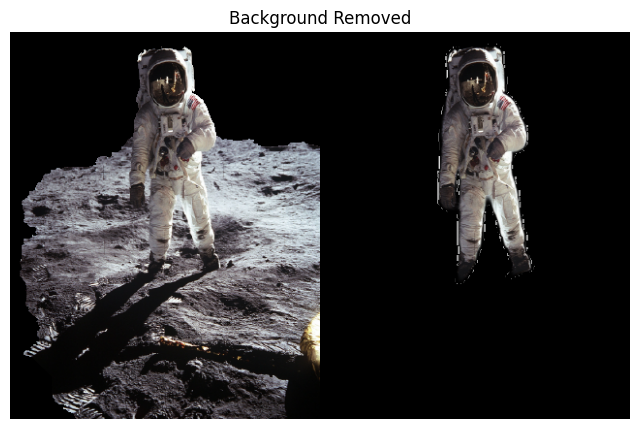

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FileUpload, VBox
from IPython.display import display
import io
from PIL import Image

def remove_background(image):
    # Create a mask with an initial rectangular ROI
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # Define the background and foreground models for GrabCut
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    
    # Define a rectangle around the object (Adjust as needed)
    height, width = image.shape[:2]
    rect = (10, 10, width - 10, height - 10)
    
    # Apply GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    
    # Convert mask values: 0,2 -> Background (black), 1,3 -> Foreground (white)
    mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
    
    # Apply mask to original image
    result = image * mask_binary[:, :, np.newaxis]
    
    return result

def on_upload_change(change):
    for file_info in change['new']:
        image = Image.open(io.BytesIO(file_info['content']))
        image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        image = cv2.resize(image, (640, 400))
        
        # Process image to remove background
        output_image = remove_background(image)

        # Convert OpenCV image to PIL for display
        output_pil = Image.fromarray(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

        # Save the result
        output_pil.save("output.png")

        # Display using Matplotlib
        plt.figure(figsize=(8, 6))
        plt.imshow(output_pil)
        plt.axis("off")  # Hide axes
        plt.title("Background Removed")
        plt.show()

# Create upload button
upload_button = FileUpload(accept='image/*', multiple=False)
upload_button.observe(on_upload_change, names='value')

# Display upload button
display(VBox([upload_button]))